In [ ]:
import pandas as pd
import numpy as np
import matplotlib as m
import matplotlib.pyplot as plt

In [ ]:
# importing yeast count data

# 42 clean WT replicates
WT_yeast = pd.read_csv('WT_yeast.csv', index_col=0)

# 44 clean Snf2 mutant replciates
Snf2_yeast = pd.read_csv('Snf2_yeast.csv', index_col=0)

display(WT_yeast)
display(Snf2_yeast)

In [ ]:
# importing yeast count data >>> q-values
# from explore_clean_yeast_consistency.ipynb

# 42 clean WT replicates
WT_yeast_q = pd.read_csv('WT_yeast_q.csv', index_col=0)

# 44 clean Snf2 mutant replciates
Snf2_yeast_q = pd.read_csv('Snf2_yeast_q.csv', index_col=0)

display(WT_yeast_q)
display(Snf2_yeast_q)

In [ ]:
# importing yeast count data >>> average q-values
# from explore_clean_yeast_consistency.ipynb

# 42 clean WT replicates
WT_yeast_avq = pd.read_csv('WT_yeast_avq.csv', index_col=0)

# 44 clean Snf2 mutant replciates
Snf2_yeast_avq = pd.read_csv('Snf2_yeast_avq.csv', index_col=0)

display(WT_yeast_avq)
display(Snf2_yeast_avq)

In [ ]:
# importing results from differential gene expression anaylsis
RALL_bayexpress = pd.read_csv('RALL_bayexpress.csv', index_col=0)

display(RALL_bayexpress)

In [ ]:
# importing bootstrapping results
# via package_comp_numbers.ipynb

bayexpress_BFNtrue = pd.read_csv('bayexpress_BFNtrue.csv').set_index('locus_name')
display(bayexpress_BFNtrue)

bayexpress_Ntrue = pd.read_csv('bayexpress_Ntrue.csv').set_index('locus_name')
display(bayexpress_Ntrue)

edgeR_Ntrue = pd.read_csv('edgeR_Ntrue.csv').set_index('genes')
display(edgeR_Ntrue)

DESeq2_Ntrue = pd.read_csv('DESeq2_Ntrue.csv').set_index('genes')
display(DESeq2_Ntrue)

In [ ]:
is_true = RALL_bayexpress.loc[0].AOTP_WT
message = f"Value is {'*' if is_true else ''}"
print(message)

In [44]:
# define function to get plots showing the package comparison numbers
# all the info from explore_clean_yeast.ipynb
# plus consistency tests
# PCN plots, 100 bootstrapping iterations


def stalk(genes):

    # Find the index of all genes
    igenes = [list(RALL_bayexpress.locus_name).index(gene) for gene in genes]
    
    # Some more numbers about the genes
    display(WT_yeast.iloc[igenes])
    display(Snf2_yeast.iloc[igenes])
    display(RALL_bayexpress.iloc[igenes])

    # printing q-plots
    for t in igenes:
        fig, ax = plt.subplots(dpi=300)

        ax.hist(WT_yeast_q.iloc[t], 10, density=False, histtype='step', color='#332288',
                alpha=0.4, orientation='horizontal')

        ax.hist(Snf2_yeast_q.iloc[t], 10, density=False, histtype='step', color='#DDCC77',
                alpha=0.4, orientation='horizontal')


        # scatter WT
        gene_WT_nBF = str(RALL_bayexpress.loc[t].nBF_WT.round(3))
        gene_ATOP_WT = RALL_bayexpress.loc[0].AOTP_WT
        ax.scatter(np.arange(1,len(WT_yeast_q.columns)+1), WT_yeast_q.iloc[t],
                
            c='#332288', s=30, 
            label=f'nBF = {gene_WT_nBF}{"*" if gene_ATOP_WT else ""}',
            alpha=0.9, edgecolors='none')
        
        # scatter Snf2
        gene_Snf2_nBF = str(RALL_bayexpress.loc[t].nBF_Snf2.round(3))
        gene_ATOP_Snf2 = RALL_bayexpress.loc[0].AOTP_Snf2
        ax.scatter(np.arange(1,len(Snf2_yeast_q.columns)+1), Snf2_yeast_q.iloc[t],
                
            c='#DDCC77', s=30, 
            label=f'nBF = {gene_Snf2_nBF}{"*" if gene_ATOP_Snf2 else ""}',
            alpha=0.9, edgecolors='none')
        
        ax.legend(loc='upper right')
        
        # average estimates WT
        series = WT_yeast_avq.iloc[t,1:]
        series.plot(color='#332288', alpha=0.3, linewidth=10)
        
        # average estimates Snf2
        series = Snf2_yeast_avq.iloc[t,1:]
        series.plot(color='#DDCC77', alpha=0.3, linewidth=10)
            
        gene = str(RALL_bayexpress.loc[t].locus_name)
        gene_BF = str(RALL_bayexpress.loc[t].BF.round(3))
        gene_iFC = str(RALL_bayexpress.loc[t].FC.round(3))
        ax.set_title(f'{gene}:      BF = {gene_BF}, iFC = {gene_iFC}')

        # Use tex in labels
        ax.set_xticks(np.arange(1,44))
        ax.set_xticklabels('')

        # formatting y axis ticks
        plt.gca().ticklabel_format(axis='y', style='plain', useOffset=False)

        ax.set_xlabel('Replicates')
        ax.set_ylabel('q = (n+1) / (N+2)')

        plt.show()

    # package number comparison plots
    reps = ['3/3 R', '6/6 R', '12/12 R', '20/20 R']

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, dpi=300, figsize=(8,3))

    # Bayes factors

    im = ax1.imshow(bayexpress_Ntrue.loc[genes].values, cmap='cividis', alpha=0.3, norm=m.colors.Normalize(vmin=0, vmax=100))

    ax1.set_xticks(np.arange(len(reps)), labels=reps)
    ax1.set_yticks(np.arange(len(genes)), labels=genes)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(genes)):
        for j in range(len(reps)):
            text = ax1.text(j, i, bayexpress_Ntrue.loc[genes].values[i, j],
                        ha="center", va="center", color="black")
    ax1.set_title('BF')

    # edgeR

    im = ax2.imshow(edgeR_Ntrue.loc[genes].values, cmap='cividis', alpha=0.3, norm=m.colors.Normalize(vmin=0, vmax=100))

    ax2.set_xticks(np.arange(len(reps)), labels=reps)
    ax2.set_yticks([], labels=[])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(genes)):
        for j in range(len(reps)):
            text = ax2.text(j, i, edgeR_Ntrue.loc[genes].values[i, j],
                        ha="center", va="center", color="black")
    ax2.set_title('edgeR')



    # DESeq2

    im = ax3.imshow(DESeq2_Ntrue.loc[genes].values, cmap='cividis', alpha=0.3, norm=m.colors.Normalize(vmin=0, vmax=100))

    ax3.set_xticks(np.arange(len(reps)), labels=reps)
    ax3.set_yticks([], labels=[])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax3.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(genes)):
        for j in range(len(reps)):
            text = ax3.text(j, i, DESeq2_Ntrue.loc[genes].values[i, j],
                        ha="center", va="center", color="black")
    ax3.set_title('DESeq2')


    # Bayes factors only

    im = ax4.imshow(bayexpress_BFNtrue.loc[genes].values, cmap='cividis', alpha=0.3, norm=m.colors.Normalize(vmin=0, vmax=100))

    ax4.set_xticks(np.arange(len(reps)), labels=reps)
    ax4.set_yticks([], labels=[])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax4.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(genes)):
        for j in range(len(reps)):
            text = ax4.text(j, i, bayexpress_BFNtrue.loc[genes].values[i, j],
                        ha="center", va="center", color="black")
    ax4.set_title('BF > 1')
    plt.show()

,genes,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
4118,YLL039C,2871,2292,3125,5119,1856,3819,2731,4535,2751,...,2505,6020,2577,3350,3851,3740,3142,2683,3485,3700
3425,YJL098W,191,444,189,274,482,835,377,351,333,...,425,319,600,276,190,276,740,141,675,209
4105,YLL026W,7782,6824,5769,15638,5762,12947,11553,7721,8710,...,9044,14953,9460,6648,14532,10012,8658,5186,10382,11633


,genes,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
4118,YLL039C,4854,4618,4216,5444,3416,5893,3748,4813,3494,...,6705,3932,4700,3101,4272,3889,3504,4042,3635,3027
3425,YJL098W,422,275,270,406,206,479,388,422,328,...,632,355,483,251,318,441,302,344,430,272
4105,YLL026W,4902,6442,8778,6301,5824,6513,3583,9178,8045,...,8981,4753,4432,5837,7484,4437,6357,8747,3817,6881


,locus_name,BF,FC,nBF_WT,nBF_Snf2,AOTP_WT,AOTP_Snf2
4,LSR1,0.451012,0.120243,251.787125,478.066414,True,True
4118,YLL039C,533.296466,0.257212,2171.972823,14.767290,True,True
3425,YJL098W,1.025525,-0.091190,113.153322,-129.167778,True,False
4105,YLL026W,6986.693811,-0.641283,7075.514403,4404.269569,True,True


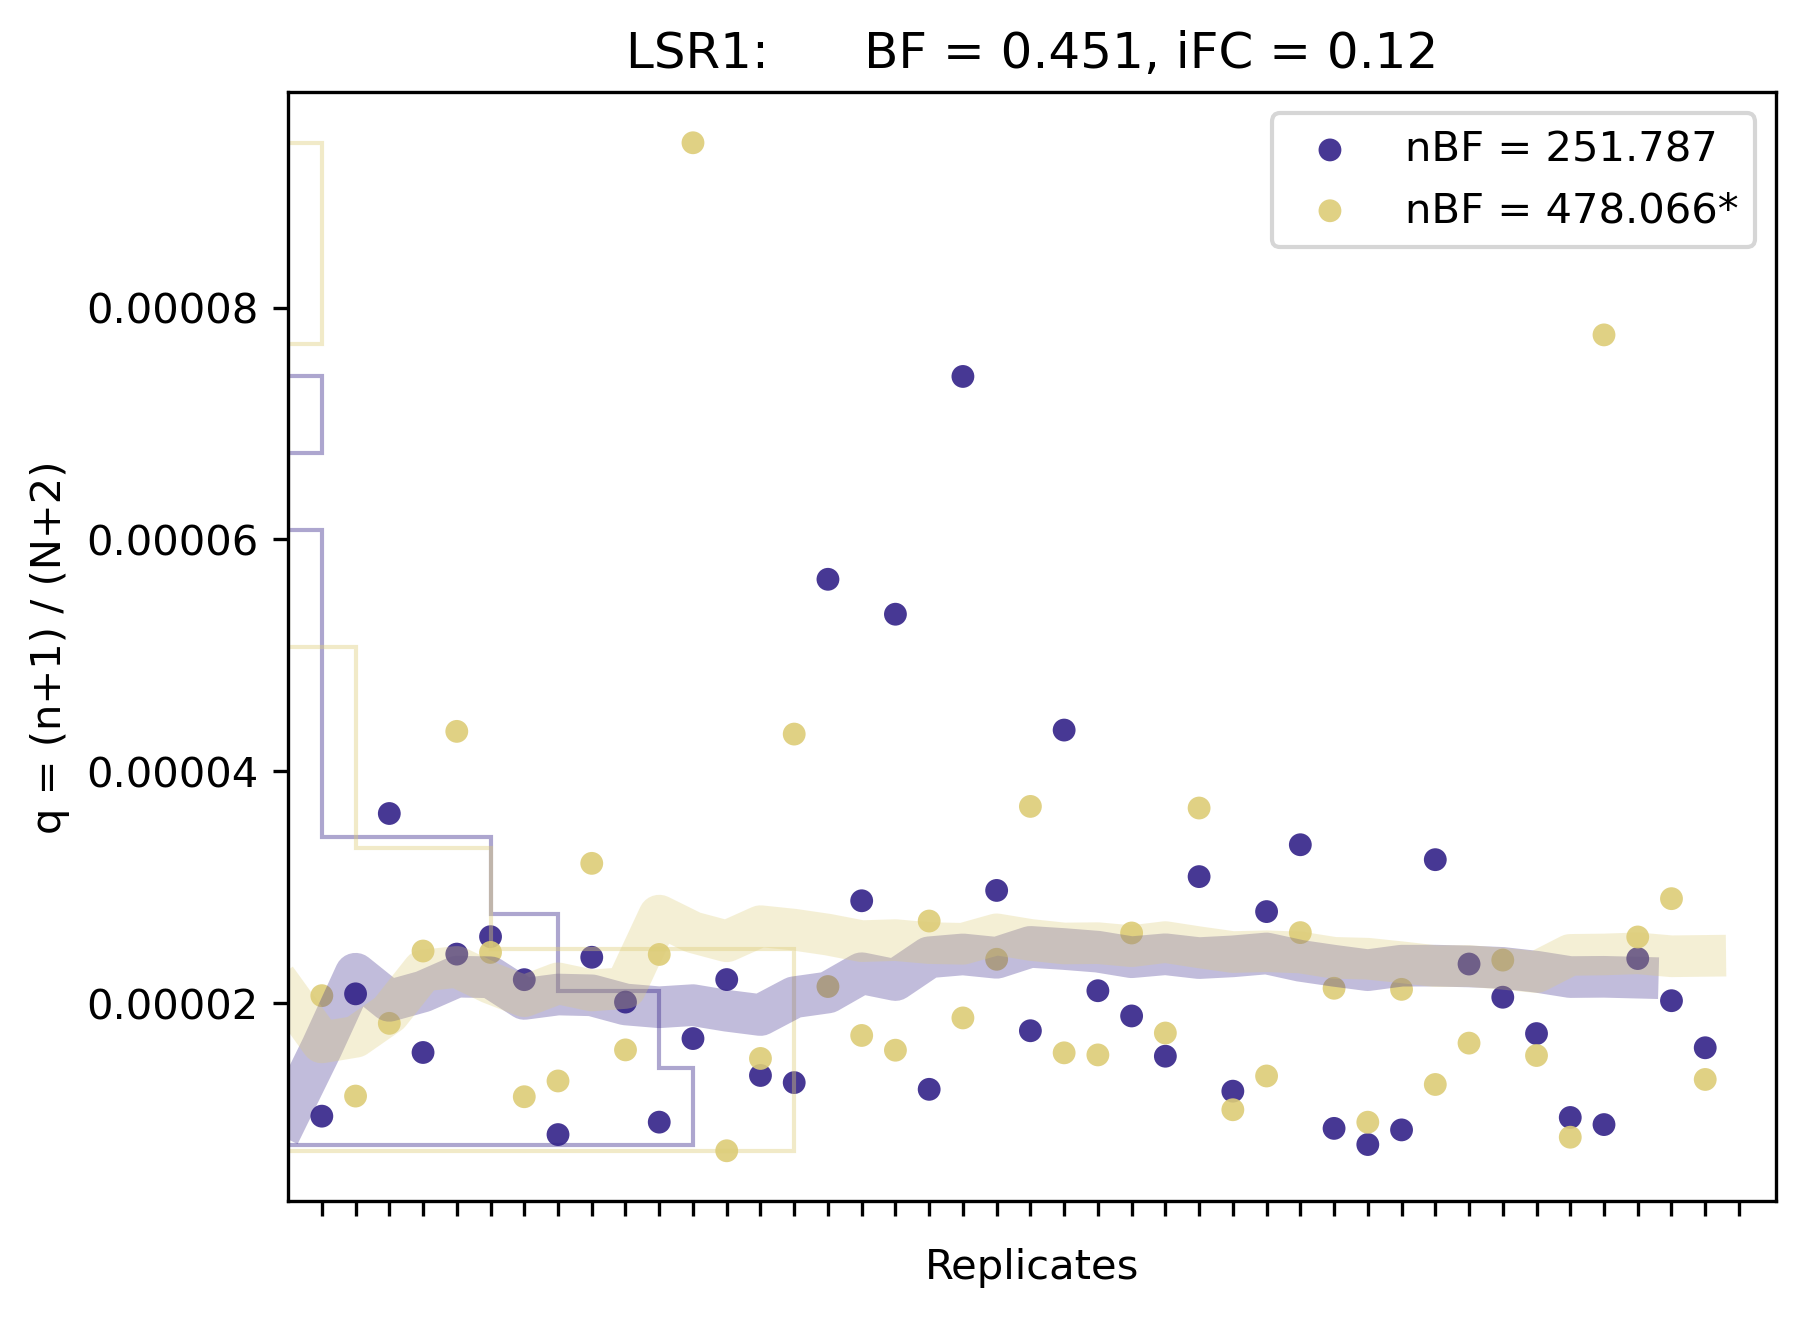

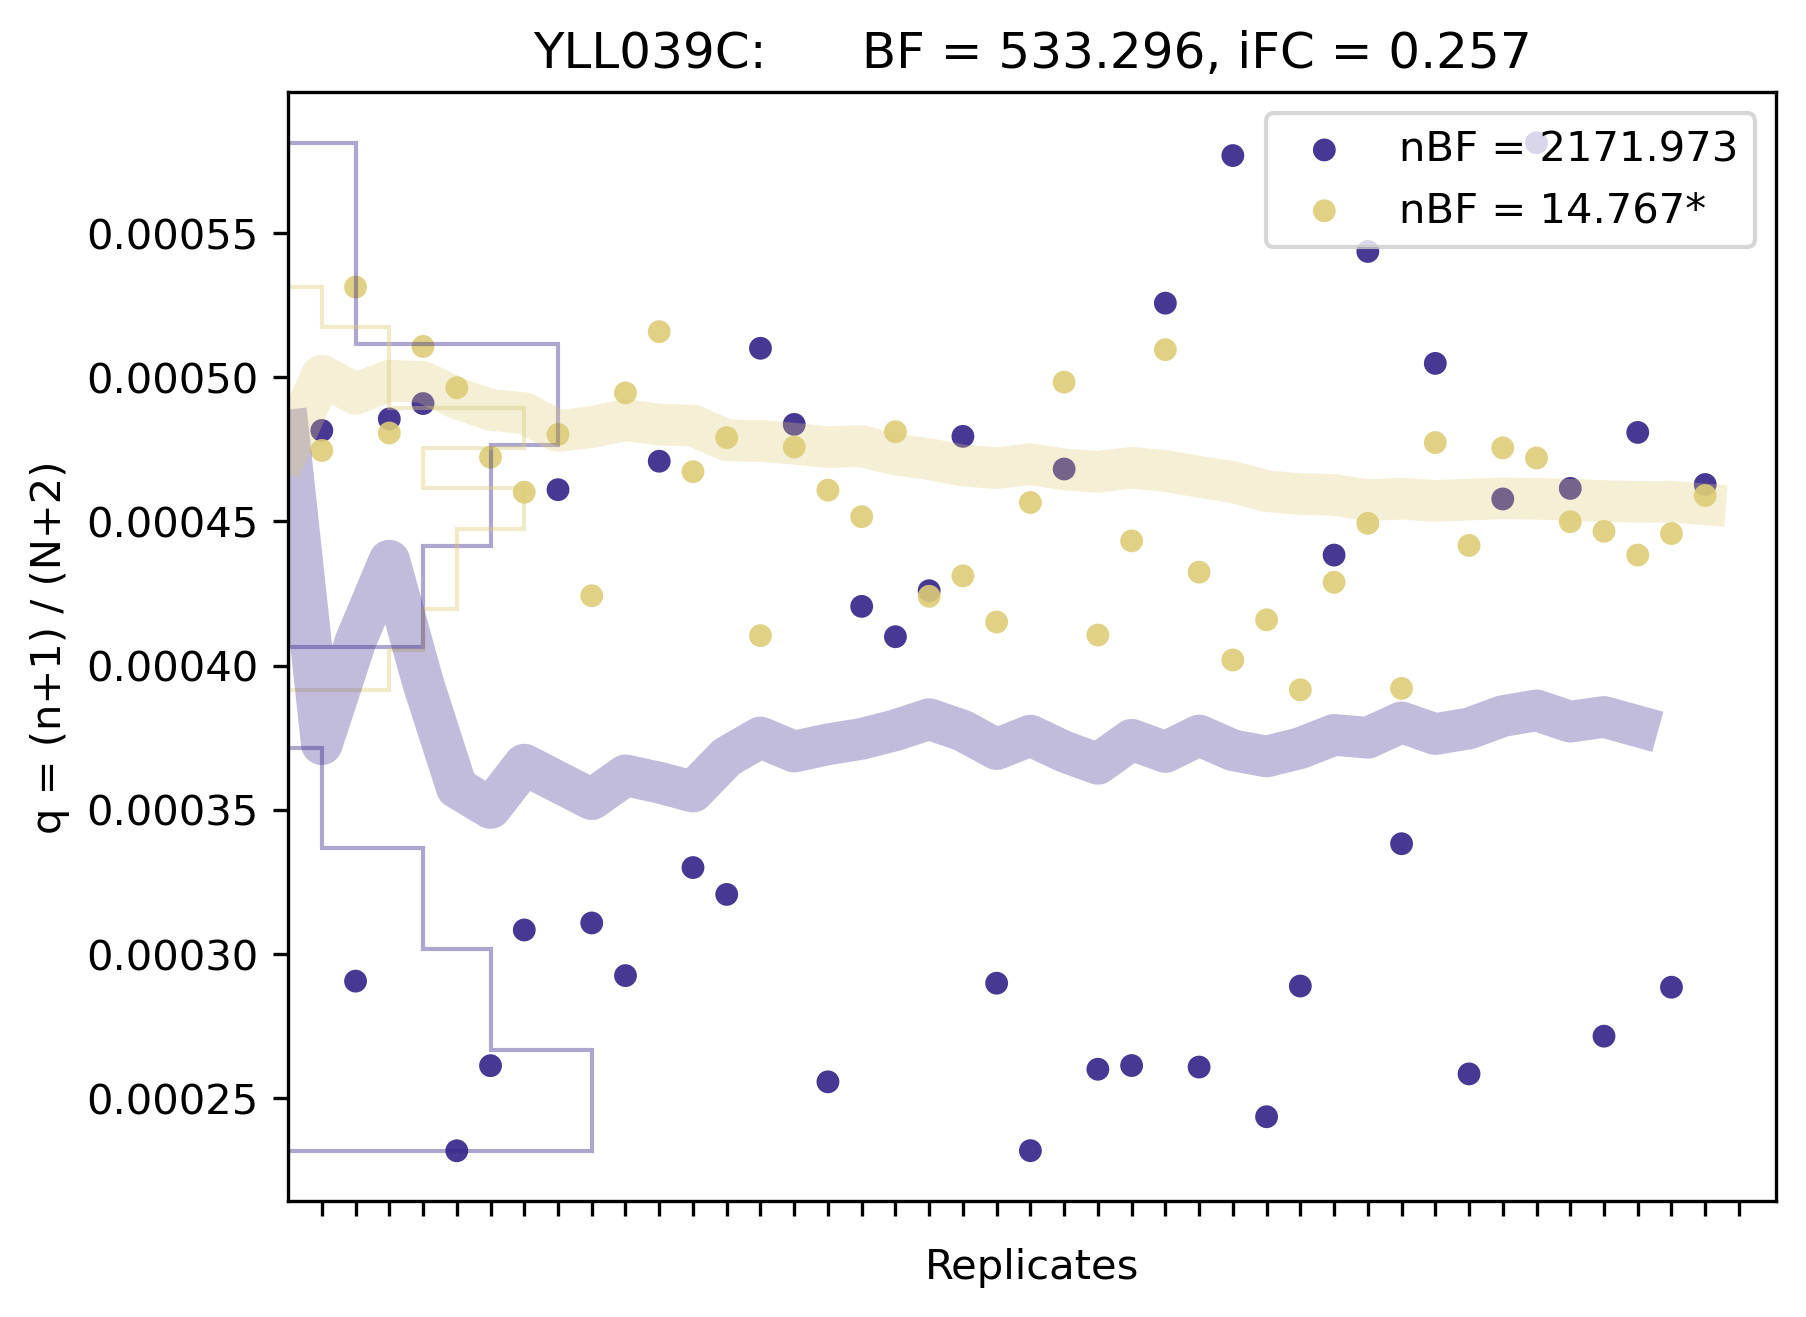

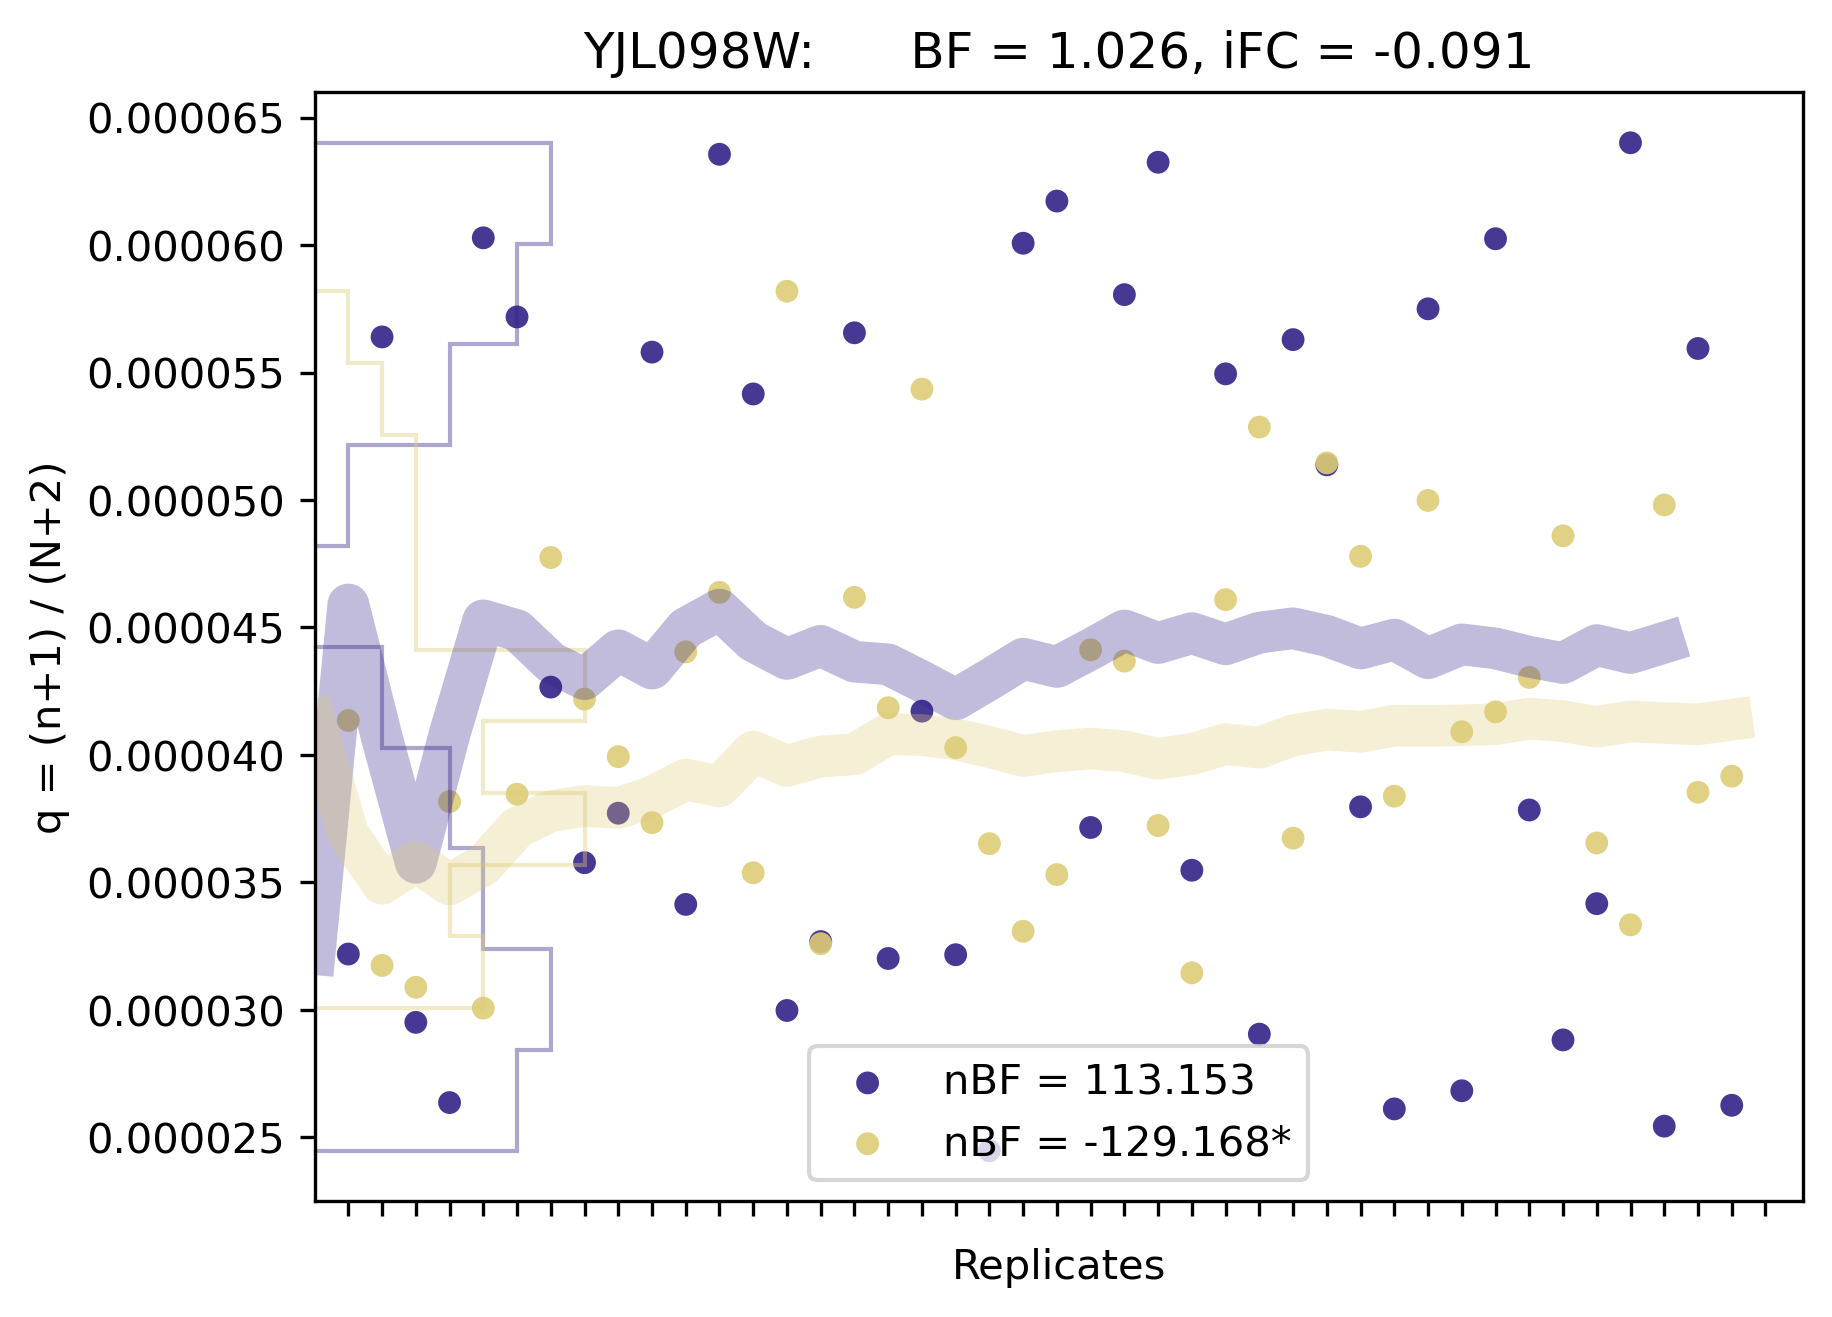

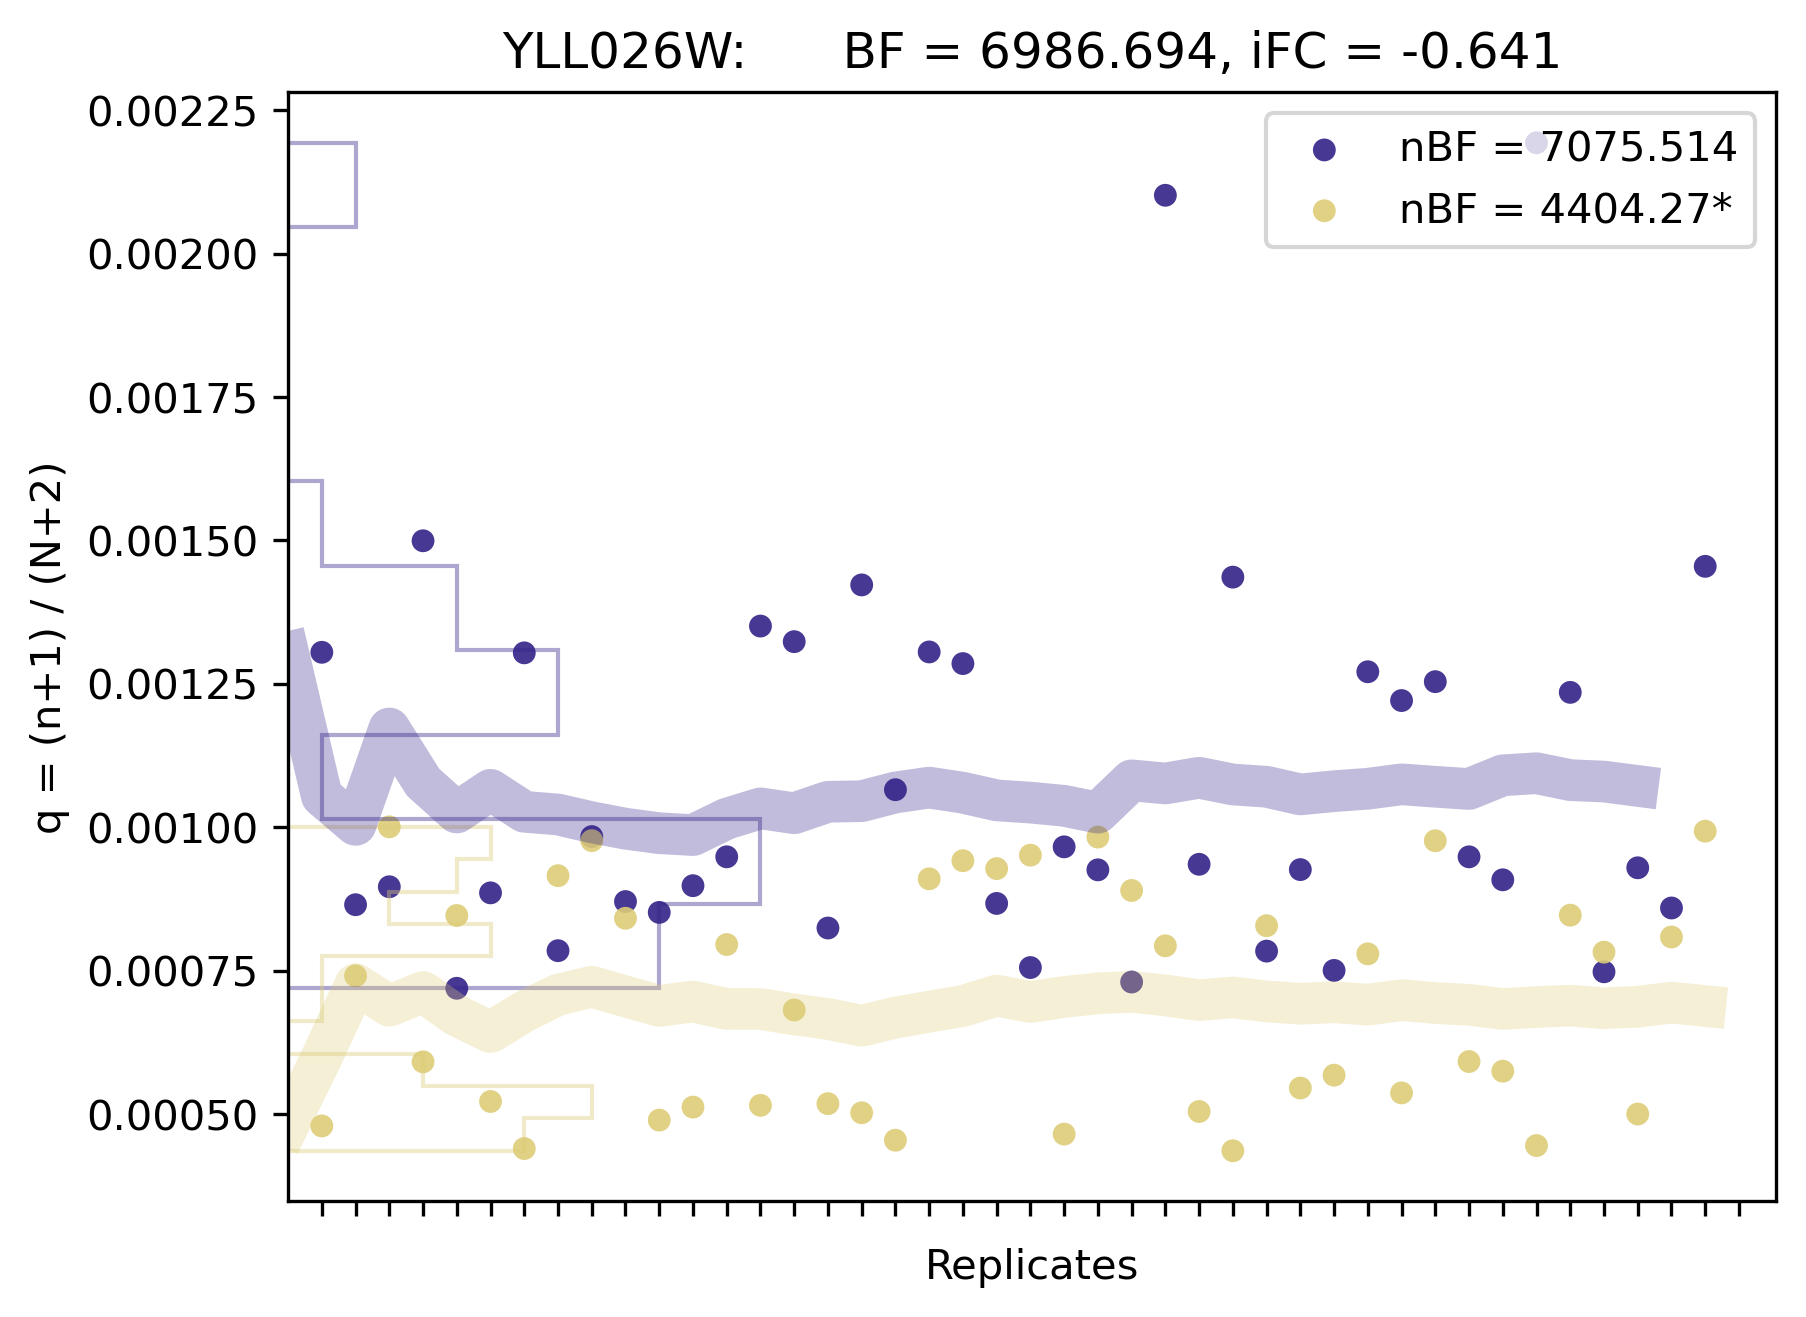

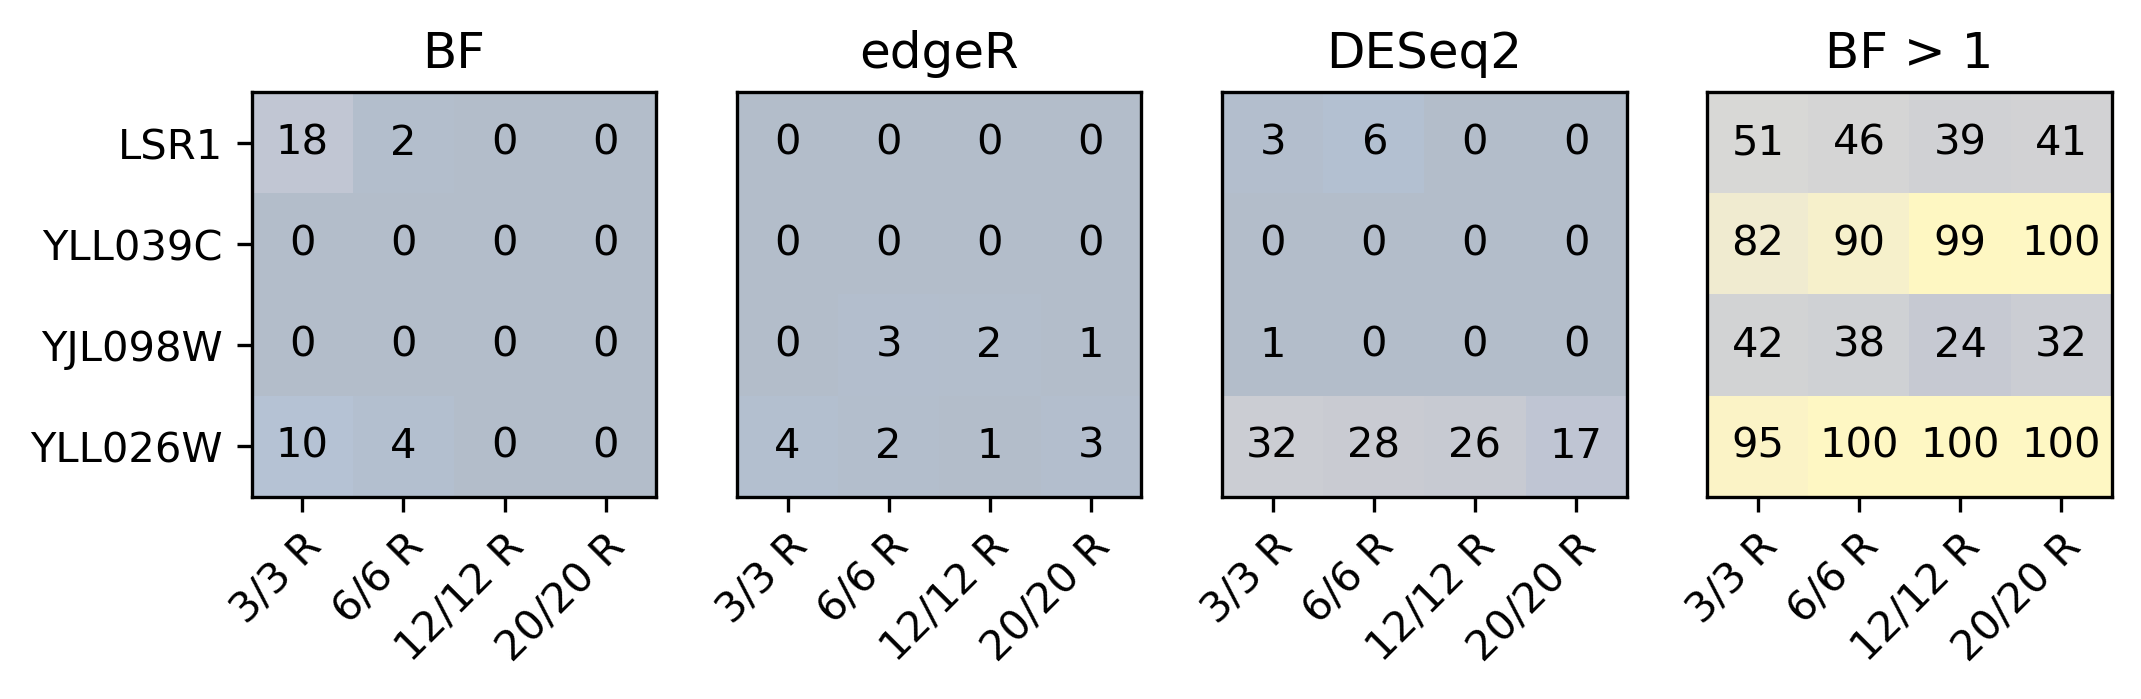

In [45]:
stalk(['LSR1', 'YLL039C', 'YJL098W', 'YLL026W'])